# Ejercicio 4

En este ejercicio realizaremos una modificación a la función filtro, para que realice el filtrado sobel, el cual realiza un realzamiento de los bordes de la imagen.

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipynb.fs.defs.Ejercicio_1 as ej1

imagen = cv.imread('imgpack/Monobanda/2_Corsica.jpg',cv.IMREAD_GRAYSCALE)

In [5]:
# Esta función auxilia realizara todo el codigo para calcular el valor final del pixel a traves
# de las columnas y filas adyacentes a el.
def aux(img,a,b):
    
    c = (img[a-1][b+1]+2*img[a][b+1]+img[a+1][b+1])-(img[a-1][b-1]+2*img[a][b-1]+img[a+1][b-1])
    
    f = (img[a-1][b-1]+2*img[a-1][b]+img[a-1][b+1])-(img[a+1][b-1]+2*img[a+1][b]+img[a+1][b+1])
    
    z = np.sqrt(np.power(c,2)+np.power(f,2))
    
    return int(np.round(z))

In [6]:
def sobel(img):
    
    resimg = img.copy()
    
    for i in range(len(resimg)):
            resimg[0] = 0
            resimg[i][0] = 0
            resimg[i][-1] = 0
            resimg[-1] = 0
            
    for i in range(len(resimg)):
        for j in range(len(resimg[i])):
            if(not(i==0 or j == 0 or i == len(resimg)-1 or j == len(resimg[i])-1)):
                resimg[i][j] = aux(img,i,j)
    
    return resimg

In [7]:
ejemplo = np.array([[12,14,17,24,32,30],
                    [19,18,17,26,36,40],
                    [26,21,17,28,40,42],
                    [20,19,18,26,33,35],
                    [14,17,20,23,27,20],
                    [35,14,22,13,40,21]])
print(sobel(ejemplo))

[[ 0  0  0  0  0  0]
 [ 0 29 35 78 58  0]
 [ 0 22 29 80 52  0]
 [ 0 18 27 63 60  0]
 [ 0  9 21 49 17  0]
 [ 0  0  0  0  0  0]]


In [9]:
img = sobel(imagen)

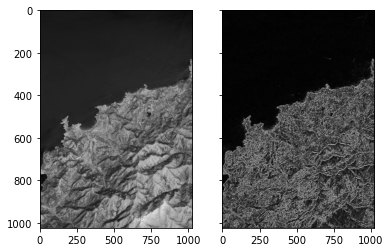

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(imagen, cmap='gray', aspect='auto')
ax2.imshow(img, cmap='gray', aspect='auto')

In [15]:
worldView = cv.imread('imgpack/WorldView_1-1_PAN.png',cv.IMREAD_GRAYSCALE)

sobelW = sobel(worldView)

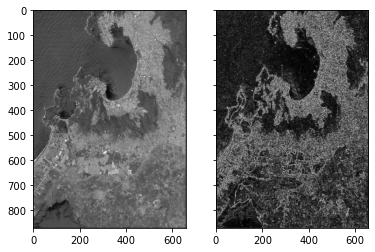

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(worldView, cmap='gray', aspect='auto')
ax2.imshow(sobelW, cmap='gray', aspect='auto')

In [11]:
peninsula = cv.imread('imgpack/peninsula.jpg',cv.IMREAD_GRAYSCALE)

sobelP = sobel(peninsula)

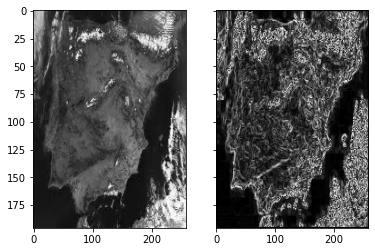

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(peninsula, cmap='gray', aspect='auto')
ax2.imshow(sobelP, cmap='gray', aspect='auto')

In [17]:
cv.imwrite("soluciones/EJ4_Sobel_Corsica.png", img)
cv.imwrite("soluciones/EJ4_Sobel_Peninsula.png", sobelP)
cv.imwrite("soluciones/EJ4_Sobel_WorldView.png", sobelW)

True